In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

In [5]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
(10000, 28, 28) (10000,)


In [6]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
x_train_scaler = stand.fit_transform(x_train.reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaler = stand.transform(x_valid.reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaler = stand.transform(x_test.reshape(-1, 1)).reshape(-1, 28, 28, 1)
# 28*28是黑白色
# 1表示图片只有一个色层，彩色图片都是3个色层——RGB

In [14]:
print(x_train_scaler.shape, y_train.shape)
print(x_test_scaler.shape, y_test.shape)

(48000, 28, 28, 1) (48000,)
(10000, 28, 28, 1) (10000,)


In [8]:
# filters：卷积过滤器的数量,对应输出的维数
# kernel_size：整数,过滤器的大小,如果为一个整数则宽和高相同
# padding：valid:表示不够卷积核大小的块,则丢弃;same表示不够卷积核大小的块就补0,所以输出和输入形状相同
# Conv2D -> Con2D -> MaxPool2D
model = keras.models.Sequential()

# 一次
model.add(
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, activation='relu', padding="same", input_shape=[28, 28, 1]))
model.add(
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, activation='relu', padding="same"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

# 二次
model.add(
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, activation='relu', padding="same"))
model.add(
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, activation='relu', padding="same"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

# 三次
model.add(
    tf.keras.layers.Conv2D(
        filters=128, kernel_size=3, activation='relu', padding="same"))
model.add(
    tf.keras.layers.Conv2D(
        filters=128, kernel_size=3, activation='relu', padding="same"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
#1.卷积层初步提取特征
#2.池化层提取主要特征
#    池化层工作原理：a.为了减少训练参数的数量，降低卷积层输出的特征向量的维度
#                   b. 减小过拟合现象，只保留最有用的图片信息，减少噪声的传递

#3.全连接层将各部分特征汇总
#4.产生分类器，进行预测识别

In [9]:
model.summary()

# 参数量=（filter size * 前一层特征图的通道数 ）* 当前层filter数量 + 偏置
# 9 * 32 + 32 = 320
# 9 * 32 * 32 + 32 = 9248
# 9 * 32 * 64 + 64 = 18496
# 9 * 64 * 64 + 64 = 36928

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         7

In [10]:
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
model.compile(loss="sparse_categorical_crossentropy", optimizer= keras.optimizers.SGD(0.01), metrics = ["accuracy"])
history = model.fit(x_train_scaler, y_train, 
                    validation_data=(x_valid_scaler, y_valid), 
                    epochs=5, 
                    callbacks=callbacks)

Epoch 1/5
1500/1500 [==============================] - 154s 103ms/step - loss: 0.7985 - accuracy: 0.7052 - val_loss: 0.4687 - val_accuracy: 0.8284
Epoch 2/5
1500/1500 [==============================] - 154s 102ms/step - loss: 0.4217 - accuracy: 0.8441 - val_loss: 0.3789 - val_accuracy: 0.864145 - accuracy: 0 - E
Epoch 3/5
1500/1500 [==============================] - 154s 103ms/step - loss: 0.3574 - accuracy: 0.8678 - val_loss: 0.3448 - val_accuracy: 0.8698
Epoch 4/5
1500/1500 [==============================] - 156s 104ms/step - loss: 0.3213 - accuracy: 0.8805 - val_loss: 0.3255 - val_accuracy: 0.87800.3228 - accuracy: 0.8 - E - ETA: 28s - loss: 0.3213 - accuracy: 0.8 - ETA: 28s - loss: 0. - ETA: 26s - loss: 0.3203 - ac - ETA: 24s - loss: 0.3207 - accur - ETA: 23s - loss: 0.3206  - ETA: - ETA: 18s - loss: 0.3213 - accuracy: 0 - ETA: 17s - loss: 0.3217 -  - ETA: 15s - loss: 0. - ETA: 13s - - ETA: 3s - los
Epoch 5/5
1500/1500 [==============================] - 147s 98ms/step - loss: 0.295

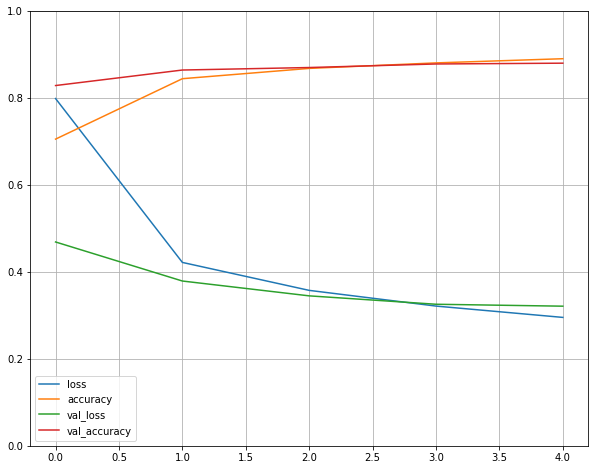

In [11]:
def plt_learning_curve(history):
    pd.DataFrame(history).plot(figsize=(10,8))
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()
    
plt_learning_curve(history.history)

In [15]:
model.evaluate(x_test_scaler, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.3452 - accuracy: 0.8711


[0.3451537489891052, 0.8711000084877014]